In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
recording_path = Path('../gameplay_rec/')

In [3]:
merged_df = []
for rec_csv_path in recording_path.glob('**/*.csv'):
    df = pd.read_csv(rec_csv_path)
    merged_df.append(df)
merged_df = pd.concat(merged_df)

In [4]:
merged_df.head()

,Unnamed: 0,cart_lap_nb,cart_has_item,cart_place,map_time,cart_last_item,cart_is_coliding,cart_coins,cart_position_x,cart_status,map_surface,cart_speed,action
0,0.0,127,0,14,0,0,0,5,27,0,64,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1.0,127,0,14,0,0,0,5,27,0,64,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,2.0,127,0,14,0,0,0,5,27,0,64,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,3.0,127,0,14,0,0,0,5,27,0,64,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,4.0,127,0,14,0,0,0,5,27,0,64,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [5]:
# you can get the key_mapping by printing self.key_mapping in mario_kart_manual.py 
key_mapping = {0: 'x', 1: 's', 4: 'Key.up', 5: 'Key.down', 6: 'Key.left', 7: 'Key.right', 8: 'z', 9: 'a'}

def action_to_string(action):
    action = eval(action)
    pressed_keys = [key_mapping[idx] for idx, value in enumerate(action) if value == 1]
    return '+'.join(pressed_keys)

action_to_idx = {action: idx for idx, action in enumerate(pd.unique(merged_df['action']))}
action_to_key = {action: action_to_string(action) for action in pd.unique(merged_df['action'])}
idx_to_key = {idx: action_to_key[action] for idx, action in enumerate(pd.unique(merged_df['action']))}

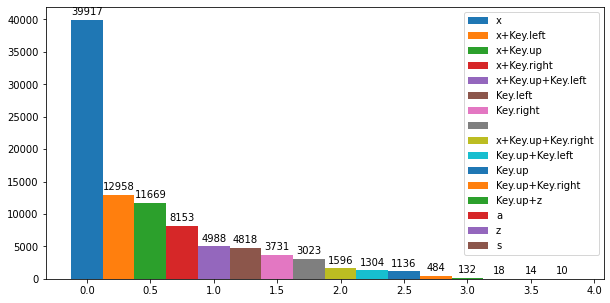

In [6]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

dist = 0.25
legend_info = []
fig, ax = plt.subplots(1, figsize=(10,5))
for idx, [action, cnt] in enumerate(merged_df['action'].value_counts().iteritems()):
    rects = ax.bar(0 + idx * dist, cnt, width = dist)
    autolabel(rects)
    legend_info.append(action_to_key[action])
plt.legend(legend_info)
plt.show()

In [7]:
for idx, [action, cnt] in enumerate(merged_df['action'].value_counts().iteritems()):
    if cnt < 2948:
        break
    print(f"{idx}: {action}, # {action_to_key[action]}")

0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # x
1: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # x+Key.left
2: [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], # x+Key.up
3: [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # x+Key.right
4: [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], # x+Key.up+Key.left
5: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # Key.left
6: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # Key.right
7: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 
